# Clustering in Machine Learning

A way of grouping the data points into different clusters, consisting of similar data points. The objects with the possible similarities remain in a group that has less or no similarities with another group

## K-Means Clustering Algorithm

he working of the K-Means algorithm is explained in the below steps:

Step-1: Select the number K to decide the number of clusters.

Step-2: Select random K points or centroids. (It can be other from the input dataset).

Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.


Step-4: Calculate the variance and place a new centroid of each cluster.

Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.

Step-7: The model is ready

###### Problem : 
we have a dataset of Mall_Customers, which is the data of customers who visit the mall and spend there.

 From this dataset, we need to calculate some patterns, as it is an unsupervised method, so we don't know what to calculate exactly.

### Data Pre-processing

In [28]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as plt    
import pandas as pd

data=pd.read_csv(r'C:/users/pc/desktop/python/Mall_Customers.csv')
data=pd.DataFrame(data)
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
x = data.iloc[:, [3, 4]].values  

#Here we don't need any dependent variable for data pre-processing step as it is a clustering problem
#we are extracting only 3rd and 4th feature because we need a 2d plot to visualize the model, and some 
#features are not required, such as customer_id.
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Finding the optimal number of clusters using the elbow method

Elbow method to select optimal value of k which uses 'WCSS' concept stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. 

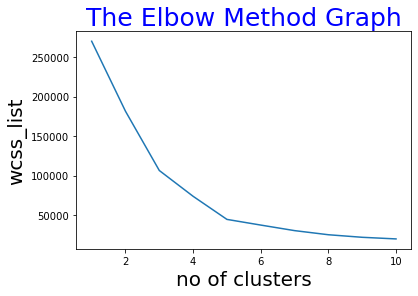

In [30]:
from sklearn.cluster import KMeans
wcss_list=[]

#Using for loop for iterations from 1 to 10.
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=43)
    #Centroid initialization, such that the initial cluster centers are placed as close as possible to the optimal cluster centers.
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)   #operation of wcss,Inertia measures how well a dataset was clustered by K-Means
                  
plt.title('The Elbow Method Graph', size='25', c='blue')                  
plt.plot(range(1,11),wcss_list)
plt.xlabel('no of clusters', size=20,c='black')
plt.ylabel('wcss_list', size=20,c='black')
plt.show()


###### the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

### Training the K-means algorithm on the training dataset

In [31]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
#we have created the dependent variable y_predict to train the model.

### Visualizing the Clusters

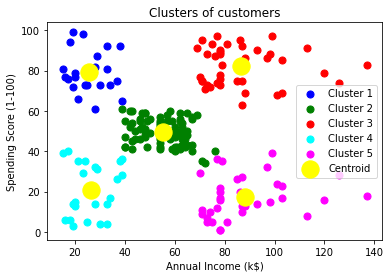

In [32]:
#visulaizing the clusters  
plt.scatter(x[y_predict== 0, 0], x[y_predict == 0, 1], s = 50, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 50, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 50, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  


Cluster1 shows the customers with average salary and average spending so we can categorize these customers as practical.

Cluster2 shows the customer has a high income but low spending, so we can categorize them as careful.

Cluster3 shows the low income and also low spending so they can be categorized as sensible.

Cluster4 shows the customers with low income with very high spending so they can be categorized as careless.

Cluster5 shows the customers with high income and high spending so they can be categorized as target, and these customers can be the most profitable customers for the mall owner.


In [12]:
kmeans.cluster_centers_[:, 0]

array([25.72727273, 55.2962963 , 86.53846154, 26.30434783, 88.2       ])

In [13]:
kmeans.cluster_centers_[:, 1]

array([79.36363636, 49.51851852, 82.12820513, 20.91304348, 17.11428571])

In [26]:
x=pd.DataFrame(x)

y_predict=pd.DataFrame(y_predict)


import numpy as np
frames = [x,y_predict]
 
    
result = pd.concat([x, y_predict], axis=1, join='inner')
result.columns=['Annual income','spending score', 'Prediction']
display(result)

,Annual income,spending score,Prediction
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4


we can observe from the above data frame that data point 1 belongs to cluster 3 and so on.

## Hierarchical Clustering Analysis

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram

we have seen in the K-means clustering that there are some challenges with this algorithm, which are a predetermined number of clusters, and it always tries to create the clusters of the same size. To solve these two challenges, we can opt for the hierarchical clustering algorithm because, in this algorithm, we don't need to have knowledge about the predefined number of clusters.

## Agglomerative Hierarchical clustering

##### Same dataset problem that we have used in  K-means clustering 

### Data Pre-processing Step

In [1]:
# Importing the libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [2]:
data=pd.read_csv(r'C:/users/pc/desktop/python/Mall_Customers.csv')
data=pd.DataFrame(data)
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x = data.iloc[:, [3, 4]].values  
#Here we have extracted only 3 and 4 columns as we will use a 2D plot to see the clusters. 
#So, we are considering the Annual income and spending score as the matrix of features.

### Finding the optimal number of clusters using the Dendrogram

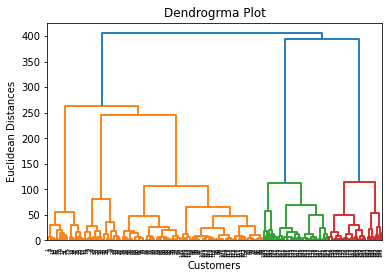

In [9]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc
dendrogram = shc.dendrogram((hc.linkage(x, method ='ward')))
dendro=shc.dendrogram((shc.linkage(x, method="ward")))
mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.show()  

Using this Dendrogram, we will now determine the optimal number of clusters for our model. For this, we will find the maximum vertical distance that does not cut any horizontal bar. Consider the below diagram

In the above diagram, we have shown the vertical distances that are not cutting their horizontal bars. As we can visualize, the 4th(yellow one) distance is looking the maximum, so according to this, the number of clusters will be 5(the vertical lines in this range). We can also take the 2nd number as it approximately equals the 4th distance

### Training the hierarchical clustering model

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  

#affinity='euclidean': It is a metric used to compute the linkage.
#linkage='ward', It reduces the variance in each cluster.
y_pred= hc.fit_predict(x)  
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

### Visualizing the clusters

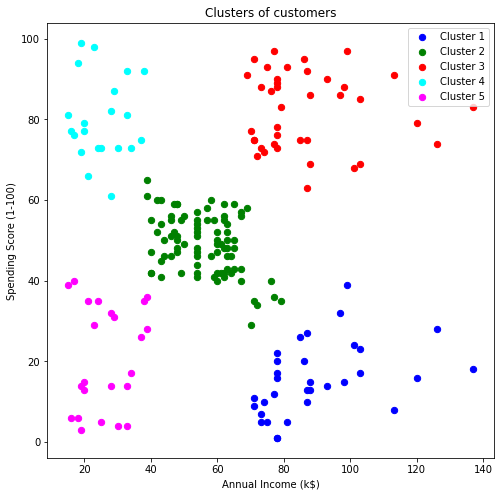

In [20]:
#visulaizing the clusters  
plt.figure(figsize=(8,8))
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 40, c = 'blue', label = 'Cluster 1')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 40, c = 'green', label = 'Cluster 2')  
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 40, c = 'red', label = 'Cluster 3')  
mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 40, c = 'cyan', label = 'Cluster 4')  
mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 40, c = 'magenta', label = 'Cluster 5')  
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()  

## Apriori Algorithm in Machine Learning

The Apriori algorithm uses frequent itemsets to generate association rules, and it is designed to work on the databases that contain transactions. With the help of these association rule, it determines how strongly or how weakly two objects are connected

#### Association Rule Learning
Association rule learning is a type of unsupervised learning technique that checks for the dependency of one data item on another data item and maps accordingly so that it can be more profitable.

###### Support is the frequency of A or how frequently an item appears in the dataset.

###### Confidence indicates how often the rule has been found to be true. Or how often the items X and Y occur together in the dataset when the occurrence of X is already given.

###### Lift: It is the strength of any rule
    
If Lift= 1: The probability of occurrence of antecedent and consequent is independent of each other.
        
Lift>1: It determines the degree to which the two itemsets are dependent to each other.
    
Lift<1: It tells us that one item is a substitute for other items, which means one item has a negative effect on another

Step-1: Determine the support of itemsets in the transactional database, and select the minimum support and confidence.

Step-2: Take all supports in the transaction with higher support value than the minimum or selected support value.

Step-3: Find all the rules of these subsets that have higher confidence value than the threshold or minimum confidence.

Step-4: Sort the rules as the decreasing order of lift.

## Market Basket analysis

##### Problem:  we have a problem of a retailer, who wants to find the association between his shop's product, so that he can provide an offer of "Buy this and Get that" to his customers.

## Data Pre-processing 

In [1]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [2]:
from apyori import apriori  

In [3]:
#Importing the dataset  
dataset = pd.read_csv(r'C:/users/pc/desktop/python/Market_Basket_Optimisation.csv') 
d=pd.DataFrame(dataset)
d


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
transactions=[]  
for i in range(0, 7500):  
    transactions.append([str(dataset.values[i,j])  for j in range(0,20)])  
    #here The str() function converts values to a string form so they can be combined with other strings.

In [5]:
str(dataset.values[0,1])

'meatballs'

In [6]:
dataset.values[i,0]

'eggs'

In [7]:
print(transactions)

[['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['whole wheat pasta', 'french fries', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['soup', 'light cream', 'shallot', 'nan', 'nan', 'nan'

In [8]:
from apyori import apriori  
rules= apriori(transactions= transactions, min_support=0.003, min_confidence = 0.2, min_lift=3, min_length=2, max_length=2)  

## Visualizing the result

In [9]:
results= list(rules)  
results 

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.0033333333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confiden

### Visualizing the rule, support, confidence, lift in more clear way:

The first item in the list is a list itself containing three items. The first item of the list shows the grocery items in the rule.

In [18]:
str(item[0])

"frozenset({'pasta', 'shrimp'})"

In [16]:
str(item[1])

'0.005066666666666666'

In [52]:
str(item[2])

"[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'shrimp'}), confidence=0.3220338983050848, lift=4.514493901473151)]"

In [58]:
str(item[2][0])

"OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'shrimp'}), confidence=0.3220338983050848, lift=4.514493901473151)"

In [56]:
str(item[2][0][2])

'0.3220338983050848'

In [11]:
for item in results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

    

Rule: chicken -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: escalope -> mushroom cream sauce
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: escalope -> pasta
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: honey -> fromage blanc
Support: 0.0033333333333333335
Confidence: 0.2450980392156863
Lift: 5.178127589063795
Rule: ground beef -> herb & pepper
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: ground beef -> tomato sauce
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: olive oil -> light cream
Support: 0.0032
Confidence: 0.20512820512820515
Lift: 3.120611639881417
Rule: olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: pasta -> shrimp
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.51449390

The support value for the first rule is 0.0045. This number is calculated by dividing the number of transactions containing light cream divided by total number of transactions. The confidence level for the rule is 0.2905 which shows that out of all the transactions that contain light cream, 29.05% of the transactions also contain chicken. Finally, the lift of 4.84 tells us that chicken is 4.84 times more likely to be bought by the customers who buy light cream compared to the default likelihood of the sale of chicken

https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/